# Python Tools Usage Examples

In [4]:
from software.proto.sensor_msg_pb2 import SensorProto
import numpy as np
import matplotlib.pyplot as plt
import os
from python_tools.proto_log import ProtoLog
from python_tools.sensor_proto_log import SensorProtoLog
from shared.proto.tbots_software_msgs_pb2 import PrimitiveSet

Text(0.5, 1.0, 'Autochip Move final angles for robot 0')

<Figure size 1440x360 with 0 Axes>

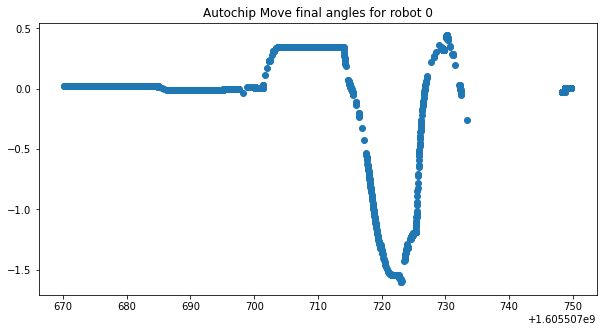

In [19]:
# Create a ProtoLog from the chunked Protobuf message files in the directory,
# with contained message type PrimitiveSet
primitive_set_proto_log = ProtoLog('/home/jordan/protologgertest/PrimitiveSet/', PrimitiveSet)

# create a list of primitives for robot 0 from the primitive sets
robot_0_primitives = [primitive_set.robot_primitives[0] for primitive_set in primitive_set_proto_log]
plt.figure(figsize=(20, 5))

# build a list of autochip move final angles and their corresponding timestamps from the list of robot 0 primitives
final_angles = []
timestamps = []
for idx, prim in enumerate(robot_0_primitives):
    if prim.HasField("autochip_move"):
        final_angles.append(prim.autochip_move.final_angle.radians)
        timestamps.append(primitive_set_proto_log[idx].time_sent.epoch_timestamp_seconds)

# plot the result
plt.figure(figsize=(10, 5))
plt.scatter(timestamps, final_angles)
plt.title("Autochip Move final angles for robot 0")

In [7]:
sensor_proto_log = SensorProtoLog('/home/jordan/protologgertest/SensorProto/')

Text(0.5, 1.0, 'Ball positions')

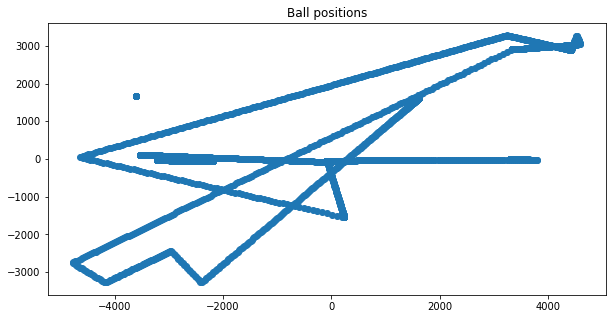

In [21]:
ball_xs = []
ball_ys = []
ball_timestamps = []

for idx, vision in enumerate(sensor_proto_log.ssl_vision_msg): 
    if vision.HasField("detection") and len(vision.detection.balls) > 0:
        # put the x and y of each ball detection into `ball_xs` and `ball_ys`
        ball_xs.extend([ball.x for ball in vision.detection.balls])
        ball_ys.extend([ball.y for ball in vision.detection.balls])
        # put the timestamp corresponding to these detections into ball_timestamps
        # the timestamps field is automatically generated for each child field of SensorMsg
        # in SensorProtoLog
        ball_timestamps.extend([sensor_proto_log.ssl_vision_msg_timestamp[idx] 
                                for ball in vision.detection.balls])
        
plt.figure(figsize=(10, 5))
plt.scatter(ball_xs, ball_ys)
plt.title("Ball positions")

Text(0.5, 1.0, 'Ball x vs. time')

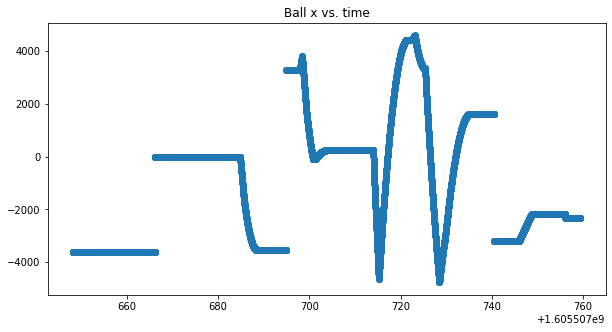

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(ball_timestamps, ball_xs)
plt.title("Ball x vs. time")